In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lazypredict.Supervised import LazyRegressor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import GammaRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.pipeline import Pipeline

In [2]:
pd.options.display.max_columns=99

In [3]:
train = pd.read_csv("dados/dataframe_features.csv")

In [4]:
features_inclusas=['item_cnt_month_item_mes_shift1','item_cnt_month_shift1',
                   'item_price_mean_item_mes_shift1','month_price_range_item_mes_shift1',
                  'item_cnt_month_categoria_mes_shift1','month_price_range_categoria_mes_shift1',
                   'month_price_range_shift1','item_price_mean_categoria_mes_shift1',
                   'item_cnt_month_item_mes_shift2','item_cnt_month_shift2',
                   'item_price_mean_item_mes_shift2','month_price_range_item_mes_shift2',
                  'item_cnt_month_categoria_mes_shift2','month_price_range_categoria_mes_shift2',
                   'month_price_range_shift2','item_price_mean_categoria_mes_shift2',
                   'item_cnt_month_item_mes_shift3','item_cnt_month_shift3',
                   'item_price_mean_item_mes_shift3','month_price_range_item_mes_shift3',
                  'item_cnt_month_categoria_mes_shift3','month_price_range_categoria_mes_shift3',
                   'month_price_range_shift3','item_price_mean_categoria_mes_shift3'
                  ]

## Preenchendo faltantes

In [5]:
train.shape

(1608226, 71)

In [90]:
df_lazy = train.sort_values('date_block_num')[['item_cnt_month','date_block_num']+features_inclusas]

In [91]:
df_lazy.item_cnt_month_item_mes_shift1 = df_lazy.item_cnt_month_item_mes_shift1.fillna(df_lazy.item_cnt_month_categoria_mes_shift1)

df_lazy.item_cnt_month_shift1 = df_lazy.item_cnt_month_shift1.fillna(df_lazy.item_cnt_month_item_mes_shift1)

df_lazy.month_price_range_item_mes_shift1 = df_lazy.month_price_range_item_mes_shift1.fillna(df_lazy.month_price_range_categoria_mes_shift1)

df_lazy.month_price_range_shift1 = df_lazy.month_price_range_shift1.fillna(df_lazy.month_price_range_item_mes_shift1)

df_lazy.item_price_mean_item_mes_shift1 = df_lazy.item_price_mean_item_mes_shift1.fillna(df_lazy.item_price_mean_categoria_mes_shift1)

In [92]:
df_lazy.item_cnt_month_item_mes_shift2 = df_lazy.item_cnt_month_item_mes_shift2.fillna(df_lazy.item_cnt_month_categoria_mes_shift2)

df_lazy.item_cnt_month_shift2 = df_lazy.item_cnt_month_shift2.fillna(df_lazy.item_cnt_month_item_mes_shift2)

df_lazy.month_price_range_item_mes_shift2 = df_lazy.month_price_range_item_mes_shift2.fillna(df_lazy.month_price_range_categoria_mes_shift2)

df_lazy.month_price_range_shift2 = df_lazy.month_price_range_shift2.fillna(df_lazy.month_price_range_item_mes_shift2)

df_lazy.item_price_mean_item_mes_shift2 = df_lazy.item_price_mean_item_mes_shift2.fillna(df_lazy.item_price_mean_categoria_mes_shift2)

In [93]:
df_lazy.item_cnt_month_item_mes_shift3 = df_lazy.item_cnt_month_item_mes_shift3.fillna(df_lazy.item_cnt_month_categoria_mes_shift3)

df_lazy.item_cnt_month_shift3 = df_lazy.item_cnt_month_shift3.fillna(df_lazy.item_cnt_month_item_mes_shift3)

df_lazy.month_price_range_item_mes_shift3 = df_lazy.month_price_range_item_mes_shift3.fillna(df_lazy.month_price_range_categoria_mes_shift3)

df_lazy.month_price_range_shift3 = df_lazy.month_price_range_shift3.fillna(df_lazy.month_price_range_item_mes_shift3)

df_lazy.item_price_mean_item_mes_shift3 = df_lazy.item_price_mean_item_mes_shift3.fillna(df_lazy.item_price_mean_categoria_mes_shift3)

In [97]:
df_lazy = df_lazy.fillna(df_lazy.median())

In [152]:
df_lazy.median()

item_cnt_month                             1.00
date_block_num                            14.00
item_cnt_month_item_mes_shift1             1.46
item_cnt_month_shift1                      1.00
item_price_mean_item_mes_shift1          387.41
month_price_range_item_mes_shift1          0.00
item_cnt_month_categoria_mes_shift1        1.80
month_price_range_categoria_mes_shift1     1.85
month_price_range_shift1                   0.00
item_price_mean_categoria_mes_shift1     393.86
item_cnt_month_item_mes_shift2             1.50
item_cnt_month_shift2                      1.35
item_price_mean_item_mes_shift2          387.93
month_price_range_item_mes_shift2          0.00
item_cnt_month_categoria_mes_shift2        1.81
month_price_range_categoria_mes_shift2     1.85
month_price_range_shift2                   0.00
item_price_mean_categoria_mes_shift2     396.00
item_cnt_month_item_mes_shift3             1.50
item_cnt_month_shift3                      1.45
item_price_mean_item_mes_shift3         

## Seleção do modelo

In [98]:
df_lazy = df_lazy.reset_index(drop=True)

In [120]:
# infelizmente tive que reduzir a quantidade de observações do lazy predict
# porque o meu computador não estava dando conta de rodar tudo
# isso pode ter influenciado o resultado, sendo mais favorável para um modelo mais simples

X_lazy = df_lazy.tail(16082)[features_inclusas].apply(zscore).clip(upper=3,lower=-3)

y_lazy = df_lazy.tail(16082).item_cnt_month

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lazy, y_lazy, test_size=0.2, random_state=42)

## Tunagem do unico parâmetro

In [163]:
gamma_reg = GammaRegressor()

In [164]:
param_grid = {
    'alpha': [0.1, 0.4,0.5,0.6, 1.0]
}

In [165]:
cv=[
    [df_lazy.index[df_lazy.date_block_num<29],df_lazy.index[df_lazy.date_block_num==29]],
    [df_lazy.index[df_lazy.date_block_num<30],df_lazy.index[df_lazy.date_block_num==30]],
    [df_lazy.index[df_lazy.date_block_num<31],df_lazy.index[df_lazy.date_block_num==31]],
    [df_lazy.index[df_lazy.date_block_num<32],df_lazy.index[df_lazy.date_block_num==32]],
    [df_lazy.index[df_lazy.date_block_num<33],df_lazy.index[df_lazy.date_block_num==33]],
]

In [166]:
grid_search = GridSearchCV(estimator=gamma_reg, param_grid=param_grid, cv=cv, scoring='r2')

In [167]:
X_grid = df_lazy[features_inclusas].apply(zscore).clip(upper=3,lower=-3)

y_grid = df_lazy.item_cnt_month

In [168]:
grid_search.fit(X_grid, y_grid)

GridSearchCV(cv=[[Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1448161, 1448162, 1448163, 1448164, 1448165, 1448166, 1448167, 1448168,
       1448169, 1448170],
      dtype='int64', length=1448171),
                  Index([1448171, 1448172, 1448173, 1448174, 1448175, 1448176, 1448177, 1448178,
       1448179, 1448180,
       ...
       1480056, 1480057, 1480058, 1480059, 1480060, 1480061, 1480062, 1480063,
       1480064, 1480065],
      dtype='int64', length...
       1576695, 1576696, 1576697, 1576698, 1576699, 1576700, 1576701, 1576702,
       1576703, 1576704],
      dtype='int64', length=1576705),
                  Index([1576705, 1576706, 1576707, 1576708, 1576709, 1576710, 1576711, 1576712,
       1576713, 1576714,
       ...
       1608216, 1608217, 1608218, 1608219, 1608220, 1608221, 1608222, 1608223,
       1608224, 1608225],
      dtype='int64', length=31521)]],
             estimator=GammaRegressor(),
             param_grid={'alpha': [0.1, 0.4, 0.5, 0.6, 1.0]}, scoring='r2')

In [169]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor score de validação cruzada:")
print(grid_search.best_score_)

Melhores parâmetros encontrados:
{'alpha': 0.4}
Melhor score de validação cruzada:
0.21290260350289705


In [170]:
grid_search.cv_results_

{'mean_fit_time': array([1.71986823, 1.79902687, 2.51579762, 1.69251409, 1.51295834]),
 'std_fit_time': array([0.1388828 , 0.16721362, 0.3600052 , 0.23663543, 0.11089282]),
 'mean_score_time': array([0.02741799, 0.02775383, 0.161902  , 0.02131495, 0.01932983]),
 'std_score_time': array([0.0143536 , 0.01137919, 0.23518925, 0.00945565, 0.00949116]),
 'param_alpha': masked_array(data=[0.1, 0.4, 0.5, 0.6, 1.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.1},
  {'alpha': 0.4},
  {'alpha': 0.5},
  {'alpha': 0.6},
  {'alpha': 1.0}],
 'split0_test_score': array([-0.02274527,  0.2796828 ,  0.24789586,  0.22066545,  0.15140005]),
 'split1_test_score': array([0.0378539 , 0.3102617 , 0.27274841, 0.24157303, 0.16415534]),
 'split2_test_score': array([0.1598905 , 0.31186396, 0.27129741, 0.23886225, 0.16101433]),
 'split3_test_score': array([0.12903239, 0.06552001, 0.05474871, 0.0469686 , 0.030076  ]),
 'split4_test_score': array([0.19757

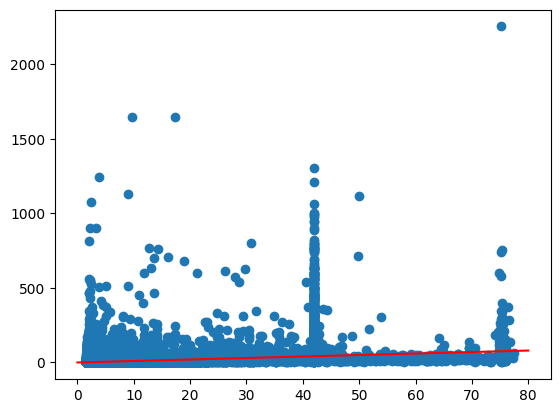

In [171]:
plt.scatter(grid_search.predict(X_grid),y_grid)
plt.plot(np.linspace(0, 80, 100), np.linspace(0, 80, 100), label='y = x', color='r')
plt.show()

## fit do modelo definitivo

In [173]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', GammaRegressor(alpha=0.4))])

In [174]:
X_final = df_lazy[features_inclusas]

y_final = df_lazy.item_cnt_month

In [179]:
# por algum motivo que não tive tempo de averiguar o resultado piora muito quando utilizo a pipeline do sklearn
pipe.fit(X_final, y_final)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GammaRegressor(alpha=0.4))])

In [180]:
r2_score(y_final, pipe.predict(X_final))

-2.503989154205785e+49

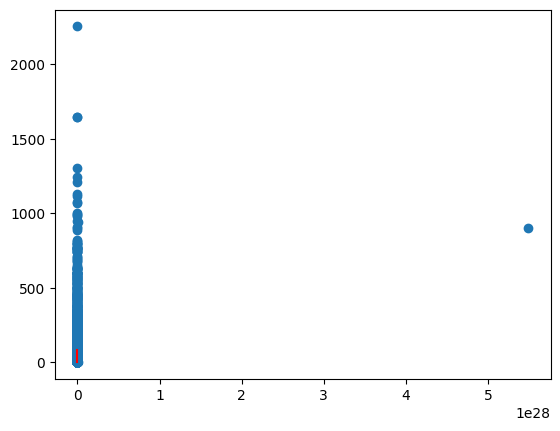

In [181]:
plt.scatter(pipe.predict(X_final),y_final)
plt.plot(np.linspace(0, 80, 100), np.linspace(0, 80, 100), label='y = x', color='r')
plt.show()

In [182]:
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(pipe, file)

# close the file
file.close()